In [24]:
import tripyview.sub_notebookheader as nb_setup
# which_matplotlib = 'inline' (default), 
#                    'notebook'(jupyter notebook), 
#                    'widget'(jupyterlab)
nb_setup.init_notebook(which_matplotlib="notebook")
# centralized autoimport of: 
# import os
# import warnings
# import time as clock
# import numpy as np
# import xarray as xr
# import shapefile as shp
# import tripyview as tpv
# client, use_existing_client = None, "tcp://0.0.0.0:0000"
# use_existing_client='tcp://127.0.0.1:42761'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### INFO:
To compute especially on large unstructured grids #vertices>1M, you need to run this notebook in parallel (do_parallel=True) on several workers (parallel_nprc...is the number of dask worker that can be allocated, parallel_tmem...is the maximum available RAM that will be distributed between the dask workers). Therefor allocate a full !!! COMPUTE NODE !!! (admins might not be happy if you do this in parallel on a login node) of a HPC of your choice with as much memory (RAM) as you can get to run this notebook!

In [25]:
# parameters
#___Dask Client Parameters____________________________________________________________
do_papermill      = False
do_parallel       = True
parallel_nprc     = 64   # number of total processes
parallel_nthread  = 1    # number of threads per worker --> number worker = parallel_nprc/parallel_nthread
parallel_tmem     = 250  # max. available RAM

#___Mesh Path & Save Path_____________________________________________________________
# mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
mesh_path          = '/albedo/work/user/pscholz/mesh_fesom2.0/core2_pool/'
# mesh_path          = '/work/ba1264/a270210/model/input/fesom2/dart/'

save_path          = '/albedo/home/pscholz/tripyview/notebooks/tuneRediGM' #None #'~/figures/test_papermill/'
save_fname         = None # filename from papermill come in through save_fname
tripyrun_name      = None # papermill workflow name of notebook 
tripyrun_analysis  = None # papermill diagnostic driver
tripyrun_spath_nb  = None # papermill path to processed notebooks
tripyrun_spath_fig = None # papermill path to processed figures

#___Data Path & Input Names___________________________________________________________
input_paths   = list()
# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm2000_cm1.0_Krtapoff/')

# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm0800_cm3.0_Krtapoff_h0s0.5/')
# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm0800_cm3.0_Krtapoff_h0s0.7/')
# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm0800_cm3.0_Krtapoff_h0s1.0/')
# # input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm0800_cm3.0_Krtapon_h0s0.5/')
# # input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm0800_cm3.0_Krtapon_Kgmtapon_h0s0.5/')

# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm0900_cm3.0_Krtapoff_h0s0.5/')
# # input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm0900_cm3.0_Krtapon_h0s0.5/')
# # input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm0900_cm3.0_Krtapon_Kgmtapon_h0s0.5/')

# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1000_cm3.0_Krtapoff_h0s0.5/')
# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1000_cm3.0_Krtapoff_h0s0.7/')
# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1000_cm3.0_Krtapoff_h0s1.0/')
# # input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1000_cm3.0_Krtapon_h0s0.5/')
# # input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1000_cm3.0_Krtapon_Kgmtapon_h0s0.5/')

# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1100_cm3.0_Krtapoff_h0s0.5/')
# # input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1100_cm3.0_Krtapon_h0s0.5/')
# # input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1100_cm3.0_Krtapon_Kgmtapon_h0s0.5/')

input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.5/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.5_Scr1.0e-2/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapon_h0s0.5_Scr1.0e-2/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.5_Scr1.0e-2_Sweeney_fixbugfct_02/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapon_h0s0.5_Scr1.0e-2_Sweeney_fixbugfct_02/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.7_Scr1.0e-2_Sweeney_fixbugfct_02/')


# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.7/')
# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s1.0/')
# # input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapon_h0s0.5/')
# # input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapon_Kgmtapon_h0s0.5/')

input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5/')
# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.7/')
# input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s1.0/')

input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm5.0_Krtapoff_h0s0.5/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapon_h0s0.5/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapon_Kgmtapon_h0s0.5/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5_Scr1.0e-2/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5_GINseascal/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5_GINseascal4/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5_FERSCALon/')
input_paths.append('/albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5_sweeney/')



input_names   = list()
# input_names.append('ctrl : Kgm=2000, cm=1.0, h0s=0.5')

# input_names.append('Kgm= 800, cm=3.0, h0s=0.5')
# input_names.append('                  h0s=0.7')
# input_names.append('                  h0s=1.0')
# # input_names.append('     ...Krtap=on, h0s=0.5')
# # input_names.append('...Krtap=Kgtap=on,h0s=0.5')

# input_names.append('Kgm= 900, cm=3.0, h0s=0.5')
# # input_names.append('     ...Krtap=on, h0s=0.5')
# # input_names.append('...Krtap=Kgtap=on,h0s=0.5')

# input_names.append('Kgm=1000, cm=3.0, h0s=0.5')
# input_names.append('                  h0s=0.7')
# input_names.append('                  h0s=1.0')
# # input_names.append('     ...Krtap=on, h0s=0.5')
# # input_names.append('...Krtap=Kgtap=on,h0s=0.5')

# input_names.append('Kgm=1100, cm=3.0, h0s=0.5')
# # input_names.append('     ...Krtap=on, h0s=0.5')
# # input_names.append('...Krtap=Kgtap=on,h0s=0.5')

input_names.append('Kgm=1200, cm=3.0, h0s=0.5')
input_names.append('            ...Scr=1.0e-2')
input_names.append('  ...Krtap=on, Scr=1.0e-2')
input_names.append(' ...h0s=0.5, Scr=1.0e-2, \n Sweeney=on, fctfix')
input_names.append(' ...h0s=0.5, Scr=1.0e-2, \n Krtap=on, Sweeney=on, fctfix')
input_names.append(' ...h0s=0.7, Scr=1.0e-2, \n Sweeney=on, fctfix')

# input_names.append('                  h0s=0.7')
# input_names.append('                  h0s=1.0')
# # input_names.append('     ...Krtap=on, h0s=0.5')
# # input_names.append('...Krtap=Kgtap=on,h0s=0.5')

input_names.append('Kgm=1500, cm=3.0, h0s=0.5')
# input_names.append('        , cm=3.0, h0s=0.7')
# input_names.append('                  h0s=1.0')

input_names.append('                ...cm=5.0')
input_names.append('              ...Krtap=on')
input_names.append('        ...Krtap=Kgtap=on')

input_names.append('            ...Scr=1.0e-2')
input_names.append('        ...GINseascal2=on')
input_names.append('        ...GINseascal4=on')
input_names.append('            ...FERscal=on')
input_names.append('            ...Sweeney=on')

# input_names.append('          cm=5.0, h0s=0.5')
# input_names.append('     ...Krtap=on, h0s=0.5')
# input_names.append('...Krtap=Kgtap=on,h0s=0.5')

# input_names.append('   ...Scr=1.0e-2, h0s=0.5')
# input_names.append('..GINseascal2=on, h0s=0.5')
# input_names.append('..GINseascal4=on, h0s=0.5')
# input_names.append('   ...FERscal=on, h0s=0.5')
# input_names.append('   ...Sweeney=on, h0s=0.5')
                   
for ii in range(len(input_names)): input_names[ii] = 'run{:02d}: '.format(ii+1)+input_names[ii]
# add_savestr='_Kgm_H0s'    
add_savestr='_Kgm1500_others'    
    
    
# n_cycl: which spinupcycle should be plottet if do_allcycl all spinupcycles from [1...n_cycle] are plottet, if None path is directly used
n_cycl    = 5 
do_allcycl= False 
vname     = 'temp'
year      = [1979,2019]
mon       = None
day       = None
record    = None 
box       = None
depth     = None

#___Define Reference Data, Year, Mon ...______________________________________________
# do anomaly plots in case ref_path is not None
ref_path  = '/albedo/scratch/user/pscholz/tuneGMRedi_Kgm2000_cm1.0_Krtapoff/'
ref_name  = 'ctrl : Kgm=2000, cm=1.0, h0s=0.5'
ref_year  = None #[1979, 2019]
ref_mon   = None
ref_day   = None
ref_record= None

#___Define Boxregion via shape file for index compuation______________________________
box_region = list()
box_region.append('global')

box_region.append('ocean_basins/Arctic_Basin.shp')
## box_region.append('ocean_basins/Eurasian_Basin.shp')
## box_region.append('mpas_region/Canada_Basin.shp')
box_region.append('mpas_region/Greenland_Sea.shp')
box_region.append('mpas_region/Norwegian_Sea.shp')

box_region.append('mpas_region/Irminger_Sea.shp')
box_region.append('mpas_region/Labrador_Sea.shp')

## box_region.append('ocean_basins/Atlantic_Basin.shp')
box_region.append('mpas_region/North_Atlantic_Ocean.shp')
box_region.append('mpas_region/South_Atlantic_Ocean.shp')

## box_region.append('ocean_basins/Pacific_Basin.shp')
box_region.append('mpas_region/North_Pacific_Ocean.shp')
box_region.append('mpas_region/South_Pacific_Ocean.shp')

box_region.append('mpas_region/Global_Ocean_15S_to_15N.shp')

box_region.append('ocean_basins/Indian_Basin.shp')

box_region.append('ocean_basins/Southern_Ocean_Basin.shp')

box_region.append('mpas_region/Western_Weddell_Sea.shp')
## box_region.append('mpas_region/Amundsen_Sea.shp')
## box_region.append('mpas_region/Western_Ross_Sea.shp')

#___Define Climatology________________________________________________________________
which_clim= 'phc3'
clim_path = '/albedo/work/projects/p_fesom/FROM-OLLIE/FESOM2/hydrography/phc3.0/phc3.0_annual.nc'
# clim_path = '/pool/data/AWICM/FESOM2/INITIAL/phc3.0/phc3.0_annual.nc'

#___Define Colormap Parameters________________________________________________________
# papermill doesnt like multi variable alignment in a single line
cstr      = 'blue2red'
cnum      = 15
cref      = None
crange    = None
cmin      = None
cmax      = None
cfac      = None
climit    = None
chist     = True
ctresh    = 0.995

ref_cstr  = 'wbgyr'
ref_cnum  = 15
ref_cref  = None
ref_crange= None
ref_cmin  = None
ref_cmax  = None
ref_cfac  = None
ref_climit= None
ref_chist = True
ref_ctresh= 0.995

#___Define Plot Parameters____________________________________________________________
# papermill doesnt like multi variable alignment in a single line
ncol              = 4      # number of pannel columns in figure
nrow              = None
plt_opt           = dict({'marker':'o'})
do_enum           = False  # do enumeration of panels
do_shdw           = False
do_mean           = True
save_dpi          = 300
save_fmt          = ['png']

# these parameters are not needed here but need to be defined for papermill 
box               = [-180, 180, -90, 90]
do_plt            = 'tcf'  # plot pcolor (tpc) or contourf (tcf)
plt_contb         = False   # background contour line (thin)
plt_contf         = False  # contour line of main colorbar steps 
plt_contr         = False  # contour line of reference value 
plt_contl         = False  # label contourline of main colorbar steps 
do_rescale        = None   # rescale data: None, 'log10', 'slog10', np.array(...)
do_lsm            ='fesom' # 'fesom', 'bluemarble', 'etopo', 'stock'
do_mesh           = False, 
mesh_opt          = dict({'color':'k', 'linewidth':0.10})
do_reffig         = False   # plot reference fig when doing anomalies 
do_clim           = True   # plot climatolgy values when doing absoluts
ax_title          = None
cb_label          = None

In [26]:
# start parallel dask client if do_parallel=True
client = tpv.shortcut_setup_daskclient(client, 
                                       use_existing_client, 
                                       do_parallel, 
                                       parallel_nprc, 
                                       parallel_tmem,
                                       threads_per_worker=parallel_nthread)

No existing Dask cluster found at: tcp://0.0.0.0:0000
Dask client already running: <Client: 'tcp://127.0.0.1:34253' processes=64 threads=64, memory=209.57 GiB>


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: //proxy/8787/status,
Dashboard: //proxy/8787/status,Workers: 64
Total threads: 64,Total memory: 209.57 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34253,Workers: 64
Dashboard: //proxy/8787/status,Total threads: 64
Started: 43 minutes ago,Total memory: 209.57 GiB
Comm: tcp://127.0.0.1:40517,Total threads: 1
Dashboard: //proxy/44857/status,Memory: 3.27 GiB
Nanny: tcp://127.0.0.1:36277,


In [27]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
mesh=tpv.load_mesh_fesom2(mesh_path, do_rot='None', focus=0, do_info=True, do_pickle=True)

#______________________________________________________________________________________________________
# create input_path spinupcycle structure
input_paths, input_names, ref_path, ref_name = tpv.shortcut_setup_pathwithspinupcycles(input_paths, input_names, ref_path, ref_name, n_cycl, do_allcycl)

#______________________________________________________________________________________________________
cinfo=tpv.set_cinfo(cstr, cnum, crange, cmin, cmax, cref, cfac, climit, chist, ctresh)
ref_cinfo=None
if (ref_path != None): 
    if ref_year   is None: ref_year   = year
    if ref_mon    is None: ref_mon    = mon
    if ref_record is None: ref_record = record
    cinfo['cref']=0.0 
    ref_cinfo=tpv.set_cinfo(ref_cstr, ref_cnum, ref_crange, ref_cmin, ref_cmax, ref_cref, ref_cfac, ref_climit, ref_chist, ref_ctresh)
 
#______________________________________________________________________________________________________    
# concatenate ref_path and input_path together if is not None,  concatenate list = list1+list2
input_paths, input_names = tpv.shortcut_setup_concatinputrefpath(input_paths, input_names, ref_path, ref_name)

#______________________________________________________________________________________________________
# define index regions --> reading shape files
box = tpv.shortcut_setup_boxregion(box_region)

#______________________________________________________________________________________________________
# use number of worker dependent chunk size for nodes and elements
chunks = dict({'time' : 12    , 
               'elem' : 'auto', 
               'nod2' : 'auto', 
               'nz1'  : mesh.nlev-1, 
               'nz'   : mesh.nlev, 
               'edg_n': 'auto'}) 

if client is not None:
    # set size limit of time chunks so that size of the total chunks covers 10% of worker memory
    mem_thresh     = 0.08
    worker_info    = client.run_on_scheduler(lambda dask_scheduler: {worker: ws.memory_limit for worker, ws in dask_scheduler.workers.items()})
    mem_limit_byte = next(iter(worker_info.items()))[1]
    print(' --> worker memory      : {:04.2f}Mb'.format(mem_limit_byte/1024**2))
    print(' --> limit chunksize to : {:04.2f}Mb'.format(mem_limit_byte/1024**2*mem_thresh))
    chunk_size = mem_limit_byte * mem_thresh/4 # dive by 4 because we use 4byte single precision
    if   chunks['time'] != 'auto': chunk_size = chunk_size/chunks['time']    
    if   chunks['nz']   != 'auto': chunk_size = chunk_size/chunks['nz']
    elif chunks['nz1']  != 'auto': chunk_size = chunk_size/chunks['nz1']
    chunks['elem'] = np.minimum(mesh.n2de, np.int32(np.ceil(chunk_size)))
    chunks['nod2'] = np.minimum(mesh.n2dn, np.int32(np.ceil(chunk_size)))
    print(' --> set elem/nod2 chunk size to {:2.2f}% of worker mem.: {:d}'.format(100*mem_thresh, chunks['nod2']))

 > warning: pickle5 module could not be found, no do_pickle 
 is possible! Therefor switch to joblib saving/loading
 > found *.jlib file: /albedo/work/user/pscholz/mesh_fesom2.0/core2_pool
 > load  *.jlib file: tripyview_fesom2_core2_pool_focus0.jlib
___FESOM2 MESH INFO________________________
 > path            = /albedo/work/user/pscholz/mesh_fesom2.0/core2_pool
 > id              = core2_pool
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, False
 > do narea,nresol = True, False
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________
00 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.5/5/ run01: Kgm=1200, cm=3.0, h0s=0.5
01 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.5_Scr1.0e-2/5/ run02:             ...Scr=1.0e-2
0

## > load data

In [28]:
t0 = clock.time()
# clean up garabage on workers before the party starts!
if client is not None: client.run(gc.collect)
gc.collect()

bias_list = list()
label_model = list()
#___APPEND ABS CLIMATOLOGY_____________________________________________________________________________    
if (vname in ['temp', 'salt', 'pdens'] or 'sigma' in vname): 
    clim_vname = vname
    ts = clock.time()
    if   vname=='temp' and  which_clim.lower()=='woa18': clim_vname = 't00an1'
    elif vname=='salt' and  which_clim.lower()=='woa18': clim_vname = 's00an1'
    clim = tpv.load_climatology(mesh, clim_path, clim_vname, do_load=False, do_persist=True, do_zweight=True)
    print(' --> elasped time to load clim: {:3.2f} min.'.format( (clock.time()-ts)/60  ))        
    print(' --> clim uses {:3.2f} Gb:'.format(clim.nbytes/(1024**3)))

    ts = clock.time()
    clim_index = tpv.load_index_fesom2(mesh, clim, box, do_harithm='wmean')
    print(' --> elasped time to comp. vert. clim profile.: {:3.2f} min.'.format( (clock.time()-ts)/60  )) 
else: 
    warnings.warn(f'No climatology for vname: {vname}')

#___LOAD FESOM2 DATA___________________________________________________________________________________
for ii, (datapath, descript) in enumerate(zip(input_paths, input_names)):
    print(ii, datapath, descript)
    label_model.append(descript)
    ts = clock.time()
    #__________________________________________________________________________________________________
    yeari, moni, dayi, recordi = year, mon, day, record
    if (ii==0) and (ref_path != None): yeari, moni, dayi, recordi = ref_year, ref_mon, ref_day, ref_record
    
    #__________________________________________________________________________________________________
    data       = tpv.load_data_fesom2(mesh, datapath, vname=vname, year=yeari, mon=moni, descript=descript , 
                                      do_info=False, do_zarithm=None, do_zweight=True, do_load=False, do_persist=True, do_parallel=do_parallel)
    
    #__________________________________________________________________________________________________    
    # check if data where loaded
    if data is None: raise ValueError(f'data == None, data could not be readed, your path:{datapath} might be wrong!!!')
    print(' --> elasped time to load data: {:3.2f} min.'.format( (clock.time()-ts)/60  ))        
    print(' --> data uses {:3.2f} Gb:'.format(data.nbytes/(1024**3)))

    #__________________________________________________________________________________________________  
    # create vert. profile --> collect the lines in a list
    ts = clock.time()
    data_index = tpv.load_index_fesom2(mesh, data, box)
    del(data)
    print(' --> elasped time to comp. vert. profile.: {:3.2f} min.'.format( (clock.time()-ts)/60  )) 
    bias_list.append(tpv.do_indexanomaly(data_index, clim_index))
    del(data_index)
    gc.collect()
    if client is not None: client.run(gc.collect)

print(' --> total elasped time tp process data: {:3.2f} min.'.format( (clock.time()-t0)/60  ))         

 --> elasped time to load clim: 0.02 min.
 --> clim uses 0.05 Gb:
 --> elasped time to comp. vert. clim profile.: 0.43 min.
0 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm2000_cm1.0_Krtapoff/5/ ctrl : Kgm=2000, cm=1.0, h0s=0.5


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.05 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.46 min.
1 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.5/5/ run01: Kgm=1200, cm=3.0, h0s=0.5


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.05 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.46 min.
2 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.5_Scr1.0e-2/5/ run02:             ...Scr=1.0e-2


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.05 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.46 min.
3 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapon_h0s0.5_Scr1.0e-2/5/ run03:   ...Krtap=on, Scr=1.0e-2


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.06 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.49 min.
4 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.5_Scr1.0e-2_Sweeney_fixbugfct_02/5/ run04:  ...h0s=0.5, Scr=1.0e-2, 
 Sweeney=on, fctfix


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.06 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.55 min.
5 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapon_h0s0.5_Scr1.0e-2_Sweeney_fixbugfct_02/5/ run05:  ...h0s=0.5, Scr=1.0e-2, 
 Krtap=on, Sweeney=on, fctfix


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.06 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.53 min.
6 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1200_cm3.0_Krtapoff_h0s0.7_Scr1.0e-2_Sweeney_fixbugfct_02/5/ run06:  ...h0s=0.7, Scr=1.0e-2, 
 Sweeney=on, fctfix


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.06 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.55 min.
7 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5/5/ run07: Kgm=1500, cm=3.0, h0s=0.5


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.07 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.55 min.
8 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm5.0_Krtapoff_h0s0.5/5/ run08:                 ...cm=5.0


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.07 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.58 min.
9 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapon_h0s0.5/5/ run09:               ...Krtap=on


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.07 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.59 min.
10 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapon_Kgmtapon_h0s0.5/5/ run10:         ...Krtap=Kgtap=on


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.07 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.59 min.
11 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5_Scr1.0e-2/5/ run11:             ...Scr=1.0e-2


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.07 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.58 min.
12 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5_GINseascal/5/ run12:         ...GINseascal2=on


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.07 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.56 min.
13 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5_GINseascal4/5/ run13:         ...GINseascal4=on


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.06 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.58 min.
14 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5_FERSCALon/5/ run14:             ...FERscal=on


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.07 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.57 min.
15 /albedo/scratch/user/pscholz/tuneGMRedi_Kgm1500_cm3.0_Krtapoff_h0s0.5_sweeney/5/ run15:             ...Sweeney=on


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 24.49 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load data: 0.07 min.
 --> data uses 0.05 Gb:
 --> elasped time to comp. vert. profile.: 0.60 min.
 --> total elasped time tp process data: 10.47 min.


## > compute absolute and relative biases

In [29]:
# define depth values, here compute index at one fixed depth level, index can be also computed
# as mean over depth range with np.arange(  10, 100+10, 10)
depth_list = [  10, #np.arange(  10, 100+10, 10), 
               100, #np.arange( 100, 500+10, 25),  
               500, #np.arange( 500,1000+10, 50),  
              1000, #np.arange(1000,2000+10,100),  
              2000, #np.arange(2000,4000+10,200), 
              4000]

ndep = len(depth_list)
nmod = len(input_names)
nbox = len(box)

relbias_heatmap = np.zeros((nbox*ndep, nmod-1))
absbias_heatmap = np.zeros((nbox*ndep, nmod))
label_indxdep=list()
for mm in range(1, nmod):
    for ii in range(nbox):
        for (dd, dep) in enumerate(depth_list): 
            #______________________________________________________________________________________
            # only create index label for the first model
            if mm==1: 
                vname = list(bias_list[mm][ii].data_vars)[0]
                # do mean over water column
                if dep is None:
                    label_indxdep.append(bias_list[mm][ii][vname].attrs['boxname'] + ': zmean')
                    
                elif isinstance(dep, np.ndarray):
                    if dd==0:
                        label_indxdep.append('{:d}-{:d}m : '.format(dep[0],dep[-1]) + bias_list[mm][ii][vname].attrs['boxname'] )
                    else:
                        label_indxdep.append('{:d}-{:d}m'.format(dep[0],dep[-1]))
                # take out specific level    
                else:
                    if dd==0:
                        label_indxdep.append('{:4d}m : '.format(dep) + bias_list[mm][ii][vname].attrs['boxname'] )
                        
                    else:
                        label_indxdep.append('{:4d}m'.format(dep))
                        
            #______________________________________________________________________________________
            # computre means over index region @ depth levels for ctrl run and modell runs 
            if dep is None:
                ctrl_z= bias_list[0 ][ii].weighted(bias_list[0][ii]['w_z']).mean(keep_attrs=True, skipna=True)[vname].values
                mod_z = bias_list[mm][ii].weighted(bias_list[mm][ii]['w_z']).mean(keep_attrs=True, skipna=True)[vname].values
                
            elif isinstance(dep, np.ndarray):
                sel_levidx = tpv.do_comp_sel_levidx(zlev, dep, False, len(zlev))
                
                ctrl_z = bias_list[0   ][ii].swap_dims({'nz1':'depth'}).rename({'depth':'nz1'}).isel({'nz1':sel_levidx})
                ctrl_z = ctrl_z.weighted(ctrl_z['w_z']).mean(keep_attrs=True, skipna=True)[vname].values
                
                mod_z = bias_list[mm  ][ii].swap_dims({'nz1':'depth'}).rename({'depth':'nz1'}).isel({'nz1':sel_levidx})
                mod_z = mod_z.weighted(mod_z['w_z']).mean(keep_attrs=True, skipna=True)[vname].values
                
            else: 
                zlev   = bias_list[mm][ii]['depth'].values
                sel_levidx = tpv.do_comp_sel_levidx(zlev, dep, False, len(zlev))
                
                ctrl_z = bias_list[0   ][ii].swap_dims({'nz1':'depth'}).rename({'depth':'nz1'}).isel({'nz1':sel_levidx})
                ctrl_z = ctrl_z.interp(nz1=abs(dep), method="linear")[vname].values
                mod_z  = bias_list[mm][ii].swap_dims({'nz1':'depth'}).rename({'depth':'nz1'}).isel({'nz1':sel_levidx})
                mod_z  = mod_z.interp( nz1=abs(dep), method="linear")[vname].values
            
            #______________________________________________________________________________________
            # relbias_heatmap[ndep*ii+dd, mm-1] = np.abs(mod_z)/np.abs(ctrl_z)
            relbias_heatmap[ndep*ii+dd, mm-1] = mod_z/ctrl_z
            absbias_heatmap[ndep*ii+dd, mm]   = mod_z
            if mm==1: absbias_heatmap[ndep*ii+dd, 0]    = ctrl_z


## > plot absolute bias heatmap 

<IPython.core.display.Javascript object>


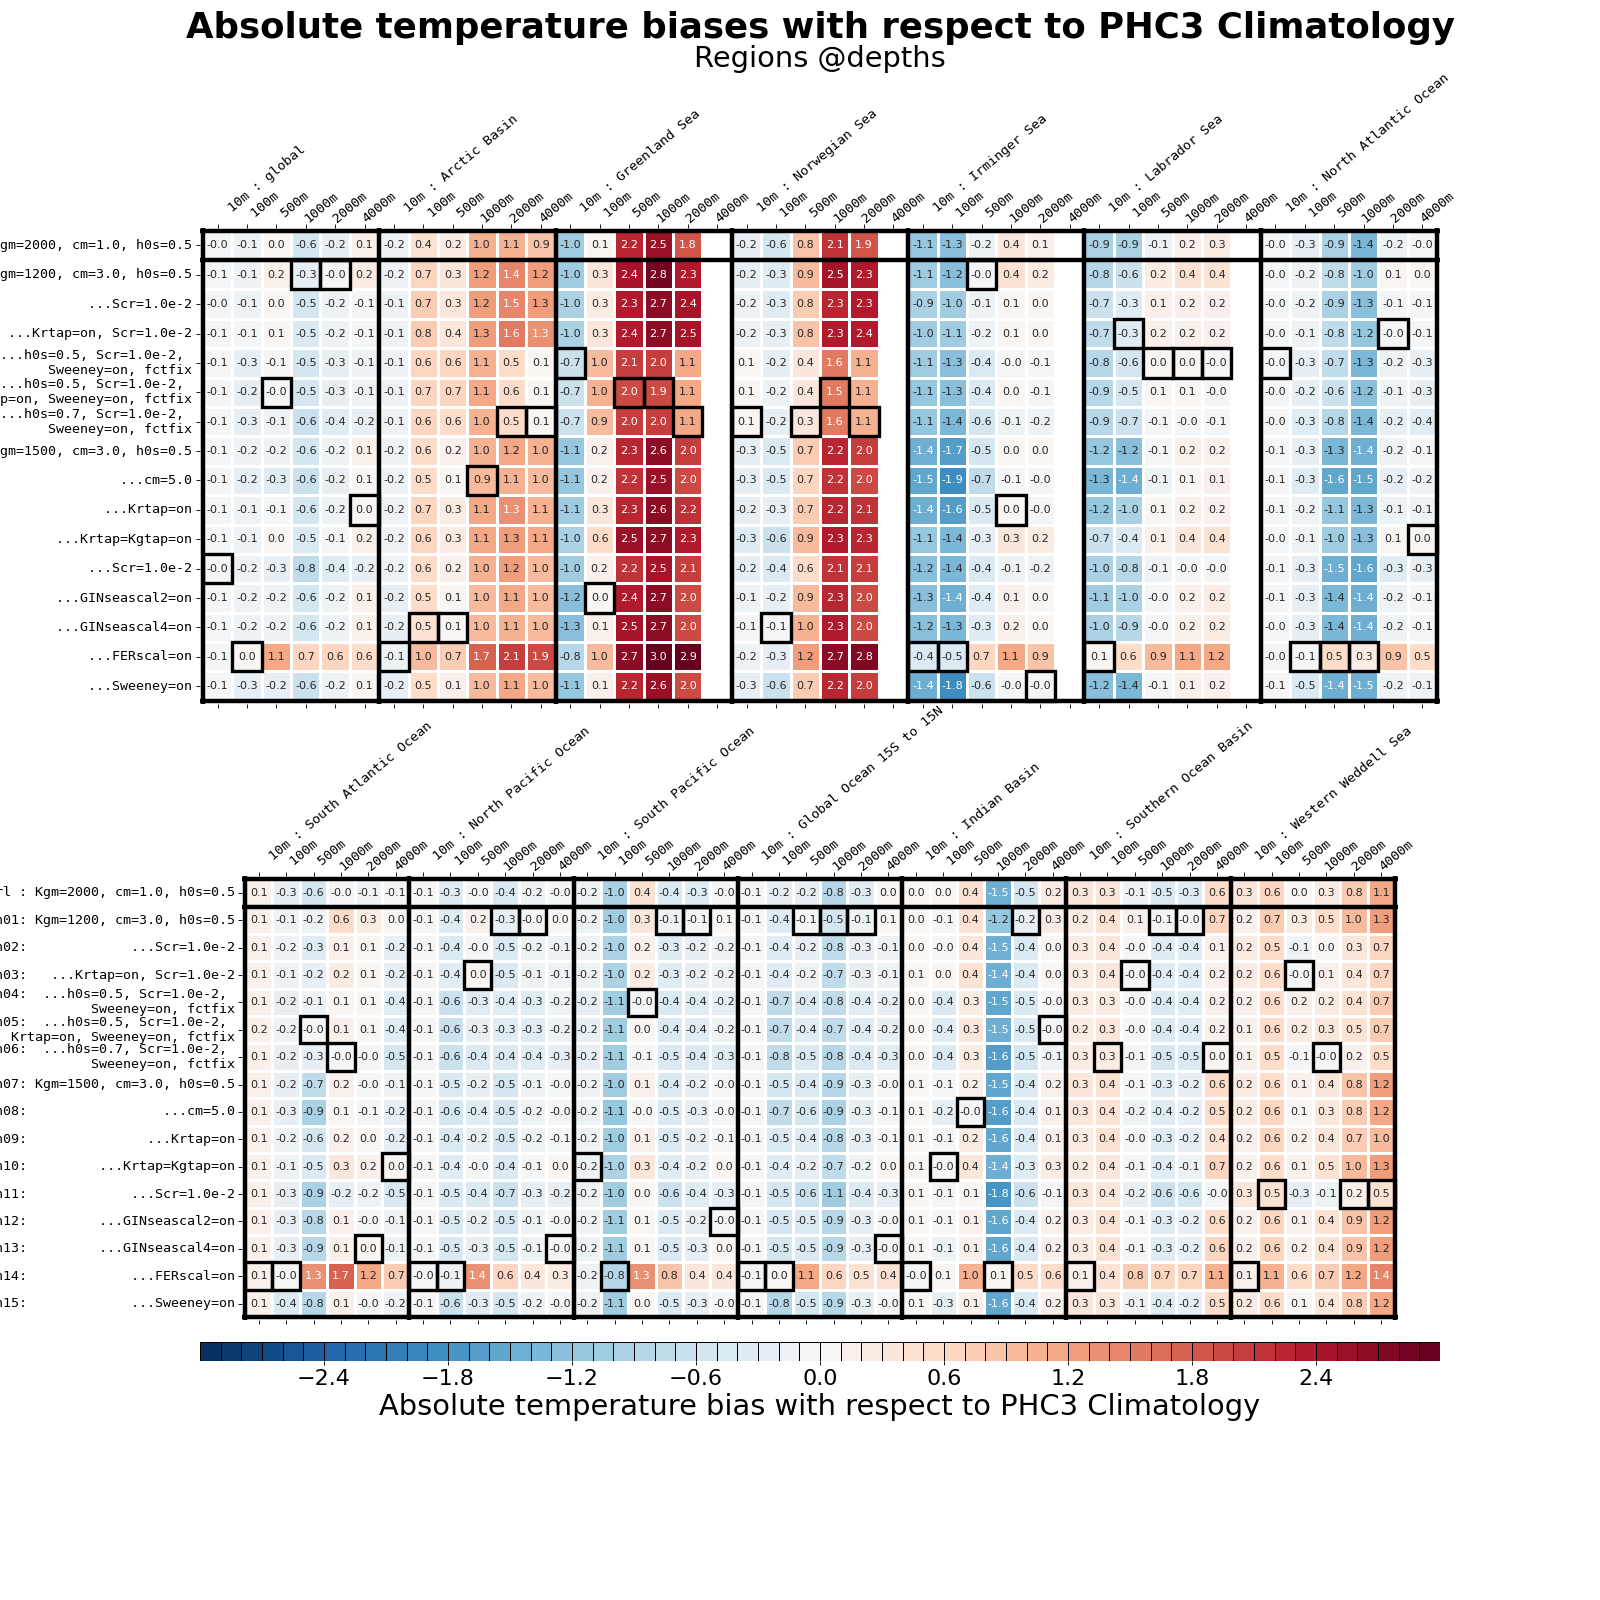

/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/matplotlib/backends/backend_nbagg.py:181: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm('matplotlib', data={'id': self.uuid})


 > save figure: /albedo/home/pscholz/tripyview/notebooks/tuneRediGM/absbias_temp_y1979-2019_didx__Kgm1500_others.png


In [35]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm

fsize_title = 32     # fontsize title
fsize_axlab = 26     # fontsize axis label
fsize_tklab = 12     # fontsize ticklabel
fsize_tklabcb = 20   # fontsize ticklabel colorbar

if   vname=='temp': 
    which_var= 'temperature'
    which_cmap = 'RdBu_r'
    which_fmt="2.1f"
    vmin, vmax, vstep = -3, 3, 0.1

elif vname=='salt': 
    which_var= 'salinity'
    which_cmap = 'PiYG_r'
    which_fmt="2.2f"
    vmin, vmax, vstep = -0.5, 0.5, 0.02

    
#_______________________________________________________________________________
# Define custom colormap
# Create custom diverging colormap: blue → white → red
N=(vmax-vmin)/vstep
# cmap = LinearSegmentedColormap.from_list("custom_bwr", ["blue", "white", "red"], N=N)
cmap = plt.get_cmap(which_cmap, N)

# Normalize: center at 0, span from -4 to +4
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

#_______________________________________________________________________________
# create pandas dataframe 
import pandas as pd
df = pd.DataFrame(absbias_heatmap.T, index=label_model, columns=label_indxdep)

n_rows, n_cols = df.shape
# Create mask for minima (excluding first row)
mask = np.zeros((n_rows, n_cols), dtype=bool)
for j, col in enumerate(df.columns):
    col_values = df.iloc[1:, j].to_numpy()  # exclude first row
    
    if np.all(col_values==0): continue
    if np.all(np.isnan(col_values)): continue
    min_idx = np.argmin(np.abs(col_values))
    # add up one index since i start at the second row, first row is 
    # control 
    mask[min_idx+1, j] = True                
    
#_______________________________________________________________________________
split_col = len(depth_list)*7
df_left   = df.iloc[:, :split_col]   # first half of columns
df_right  = df.iloc[:, split_col:]   # second half
mask_left = mask[:, :split_col]
mask_right= mask[:, split_col:]


#_______________________________________________________________________________
# hfig=plt.figure(figsize=(40, 15))
hfig, axes = plt.subplots(2, 1, figsize=(20, 20), sharex=False, constrained_layout=False)

# # Plot heatmap
# ax = sns.heatmap(df, cmap=cmap, norm=norm, 
#             annot=True, 
#             square=True, 
#             vmin=vmin, vmax=vmax, 
#             linewidths=1.0, 
#             fmt=which_fmt,   # <--- format specifier
#             cbar_kws={'label': 'absolute bias with respect to clim', 'shrink': 1.0, 'aspect': 75, 'orientation':'horizontal', 'pad': 0.04})

# --- Top heatmap (left half of columns) ---
sns.heatmap(df_left, ax=axes[0],
            cmap=cmap, norm=norm,
            annot=True, fmt=which_fmt,
            square=True,
            vmin=vmin, vmax=vmax,
            cbar=False, linewidths=1.0)

# draw horizontal thick separation lines 
axes[0].axhline(y=0     , color="black", linestyle="-", linewidth=4)
axes[0].axhline(y=1     , color="black", linestyle="-", linewidth=4)
axes[0].axhline(y=n_rows, color="black", linestyle="-", linewidth=4)
for ni in range(0,split_col+1,len(depth_list)):
    axes[0].axvline(x=ni, color="black", linestyle="-", linewidth=4)

# Draw thick black boxes for minimum bias
for (i, j), val in np.ndenumerate(mask_left):
    if i == 0:
        ...
    else:    
        if val: axes[0].add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='k', lw=3))
    

# --- Bottom heatmap (right half of columns) ---
sns.heatmap(df_right, ax=axes[1],
            cmap=cmap, norm=norm,
            annot=True, fmt=which_fmt,
            square=True,
            vmin=vmin, vmax=vmax,
            cbar=True, linewidths=1.0,
            cbar_kws={'label': 'absolute bias with respect to clim', 'shrink': 1.0, 'aspect': 65, 'orientation':'horizontal', 'pad': 0.04})

# draw horizontal thick separation lines 
axes[1].axhline(y=0     , color="black", linestyle="-", linewidth=4)
axes[1].axhline(y=1     , color="black", linestyle="-", linewidth=4)
axes[1].axhline(y=n_rows, color="black", linestyle="-", linewidth=4)
for ni in range(0,split_col+1,len(depth_list)):
    axes[1].axvline(x=ni, color="black", linestyle="-", linewidth=4)

# Draw thick black boxes for minimum bias
for (i, j), val in np.ndenumerate(mask_right):
    if i == 0:
        ...
    else:    
        if val: axes[1].add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='k', lw=3))


# set colorbar 
cbar = axes[1].collections[0].colorbar  # get the colorbar
# cbar = fig.colorbar(
#     mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#     ax=axes,
#     orientation="horizontal",
#     fraction=0.02,
#     pad=0.02,
# )
cbar.ax.tick_params(labelsize=20)
cbar.solids.set_edgecolor("k")
cbar.solids.set_linewidth(0.5)
cbar.drawedges = True 
from matplotlib.ticker import MaxNLocator
cbar.locator = MaxNLocator(nbins=10)  # ask for ~10 ticks
cbar.update_ticks()
cbar.ax.tick_params(labelsize=fsize_tklabcb)  # tick labels fontsize    
cbar.set_label(
    f"Absolute {which_var} bias with respect to {which_clim.upper()} Climatology",
    fontsize=fsize_axlab,
)            
            
            
# --- Adjust tick labels ---
for ii, ax in enumerate(axes):
    plt.sca(ax)
    ax.tick_params(axis='x', which='both', labeltop=True, labelbottom=False)
    ax.xaxis.set_ticks_position('both')
    if ii == 0 :
        ax.xaxis.set_label_position('top')  # Only one label position allowed, pick top or bottom
    else:    
        ax.xaxis.set_label_position('bottom')  
    ax.set_xlim([0.-0.1, split_col+0.1])
    ax.set_ylim([n_rows+0.1, 0.-0.1])
    plt.xticks(rotation=40, fontsize=fsize_tklab, ha="left", va="center", rotation_mode="anchor", fontfamily="DejaVu Sans Mono")
    plt.yticks(rotation=-0, fontsize=fsize_tklab, ha="right", va="center", rotation_mode="anchor", fontfamily="DejaVu Sans Mono")


# set title xlabel ylabel string
axes[0].set_title(f"Absolute {which_var} biases with respect to {which_clim.upper()} Climatology", fontsize=fsize_title, fontweight='bold')
axes[0].set_xlabel("Regions @depths", fontsize=fsize_axlab)
axes[0].set_ylabel("Model runs", fontsize=fsize_axlab)
axes[1].set_ylabel("Model runs", fontsize=fsize_axlab)
plt.subplots_adjust(hspace=0.25)


# do save filename path
spath  = save_path
sfpath = None
if spath!=None: 
    sfpath=list()
    for sfmt in save_fmt: sfpath.append( os.path.join(spath,'absbias_{:s}_y{:d}-{:d}_didx_{:s}.{:s}'.format(vname, *year, add_savestr, sfmt)) )
if save_fname!=None: sfpath = [save_fname] # --> needed for diagrun papermille functionality
for sfpath_ii in sfpath: tpv.do_savefigure(sfpath_ii, hfig, dpi=150, do_info=True, save_opt=dict())

plt.show()

## > plot relative bias heatmap 

<IPython.core.display.Javascript object>


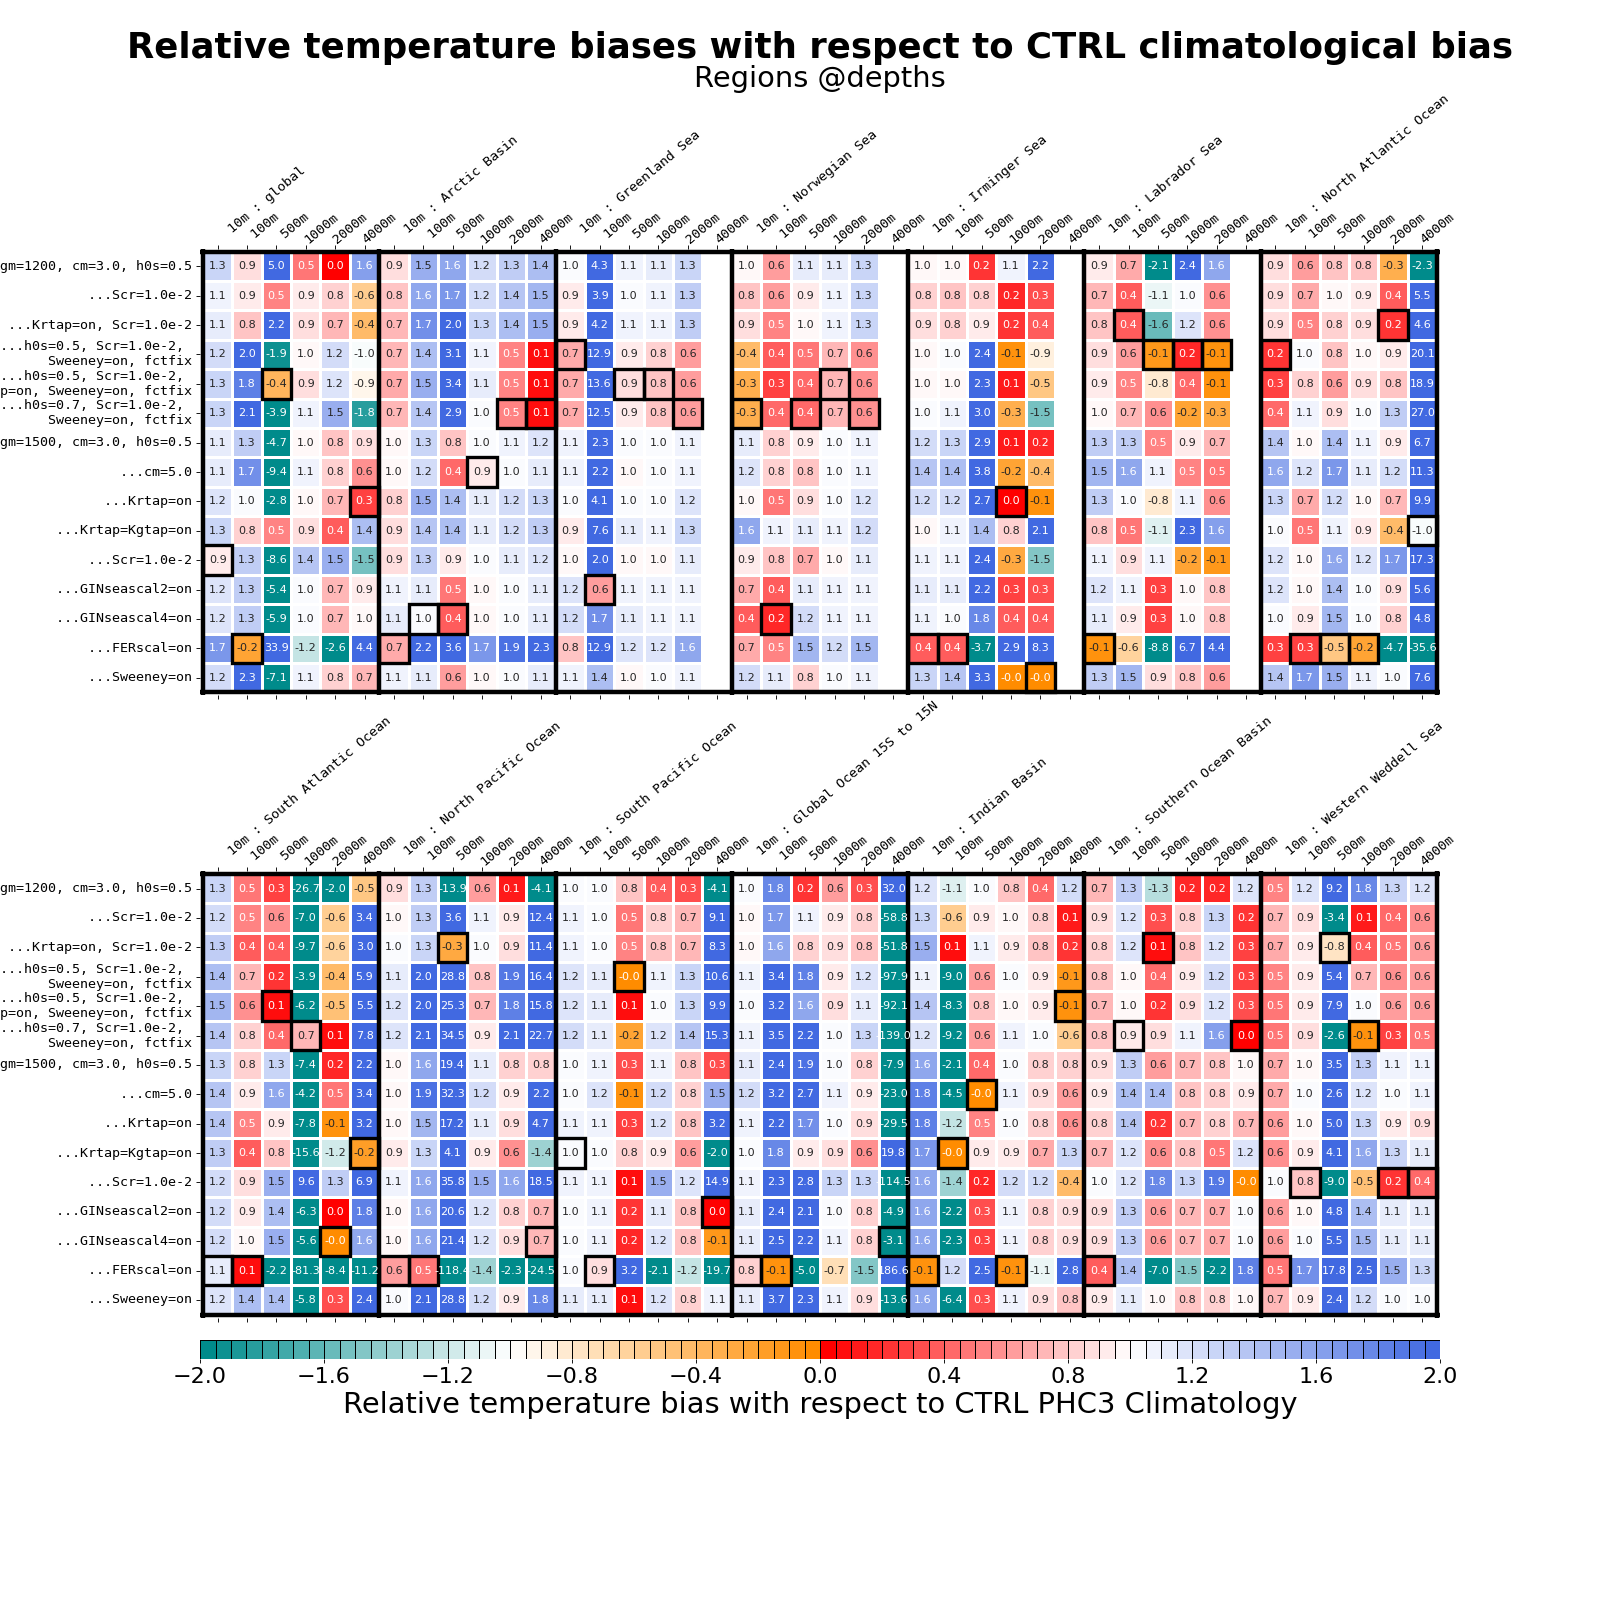

/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/matplotlib/backends/backend_nbagg.py:181: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm('matplotlib', data={'id': self.uuid})


 > save figure: /albedo/home/pscholz/tripyview/notebooks/tuneRediGM/relbias_temp_y1979-2019_didx__Kgm1500_others.png


In [38]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm

fsize_title = 32     # fontsize title
fsize_axlab = 26     # fontsize axis label
fsize_tklab = 12     # fontsize ticklabel
fsize_tklabcb = 20   # fontsize ticklabel colorbar

if   vname=='temp': 
    which_var= 'temperature'
    which_cmap = 'RdBu_r'
    which_fmt="2.1f"
    vmin, vmax, vstep = -3, 3, 0.1

elif vname=='salt': 
    which_var= 'salinity'
    which_cmap = 'PiYG_r'
    which_fmt="2.2f"
    vmin, vmax, vstep = -0.5, 0.5, 0.02

#_______________________________________________________________________________
# Define custom colormap
# Negative side: green (at -2) → white (at -1) → magenta (at 0)
N  = 40
# neg = LinearSegmentedColormap.from_list("neg", ["darkcyan", "white", "deeppink"], N=N)
neg = LinearSegmentedColormap.from_list("neg", ["darkcyan", "white", "darkorange"], N=N)

# Positive side: red (at 0) → white (at 1) → blue (at 2)
pos = LinearSegmentedColormap.from_list("pos", ["red", "white", "royalblue"], N=N)

# Combine both halves into one colormap
colors = np.vstack((
    neg(np.linspace(0, 1, N)),
    pos(np.linspace(0, 1, N))
))
cmap = ListedColormap(colors)

# Use a normalization that centers at 0
vmin, vmax = -2, 2
norm = TwoSlopeNorm(vmin=-2, vcenter=0, vmax=2)

#_______________________________________________________________________________
# create pandas dataframe 
df = pd.DataFrame(relbias_heatmap.T, index=label_model[1:], columns=label_indxdep)

n_rows, n_cols = df.shape
# Create mask for minima
mask = np.zeros((n_rows, n_cols), dtype=bool)
for j, col in enumerate(df.columns):
    col_values = df.iloc[:, j].to_numpy()  # exclude first row
    if np.all(col_values==0): continue
    if np.all(np.isnan(col_values)): continue
    min_idx = np.argmin(np.abs(np.abs(col_values)))
    mask[min_idx, j] = True

#_______________________________________________________________________________
split_col = len(depth_list)*7
df_left   = df.iloc[:, :split_col]   # first half of columns
df_right  = df.iloc[:, split_col:]   # second half
mask_left = mask[:, :split_col]
mask_right= mask[:, split_col:]


#_______________________________________________________________________________
# hfig=plt.figure(figsize=(40, 15))
hfig, axes = plt.subplots(2, 1, figsize=(20, 20), sharex=False, constrained_layout=False)

# # Plot heatmap
# ax = sns.heatmap(df, cmap=cmap, norm=norm, 
#             annot=True, 
#             square=True, 
#             vmin=vmin, vmax=vmax, 
#             linewidths=1.0, 
#             fmt=which_fmt,   # <--- format specifier
#             cbar_kws={'label': 'absolute bias with respect to clim', 'shrink': 1.0, 'aspect': 75, 'orientation':'horizontal', 'pad': 0.04})

# --- Top heatmap (left half of columns) ---
sns.heatmap(df_left, ax=axes[0],
            cmap=cmap, norm=norm,
            annot=True, fmt=which_fmt,
            square=True,
            vmin=vmin, vmax=vmax,
            cbar=False, linewidths=1.0)

# draw horizontal thick separation lines 
axes[0].axhline(y=0     , color="black", linestyle="-", linewidth=4)
# axes[0].axhline(y=1     , color="black", linestyle="-", linewidth=4)
axes[0].axhline(y=n_rows, color="black", linestyle="-", linewidth=4)
for ni in range(0,split_col+1,len(depth_list)):
    axes[0].axvline(x=ni, color="black", linestyle="-", linewidth=4)

# Draw thick black boxes for minimum bias
for (i, j), val in np.ndenumerate(mask_left):
    if i == 0:
        ...
    else:    
        if val: axes[0].add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='k', lw=3))
    

# --- Bottom heatmap (right half of columns) ---
sns.heatmap(df_right, ax=axes[1],
            cmap=cmap, norm=norm,
            annot=True, fmt=which_fmt,
            square=True,
            vmin=vmin, vmax=vmax,
            cbar=True, linewidths=1.0,
            cbar_kws={'label': 'absolute bias with respect to clim', 'shrink': 1.0, 'aspect': 65, 'orientation':'horizontal', 'pad': 0.04})

# draw horizontal thick separation lines 
axes[1].axhline(y=0     , color="black", linestyle="-", linewidth=4)
# axes[1].axhline(y=1     , color="black", linestyle="-", linewidth=4)
axes[1].axhline(y=n_rows, color="black", linestyle="-", linewidth=4)
for ni in range(0,split_col+1,len(depth_list)):
    axes[1].axvline(x=ni, color="black", linestyle="-", linewidth=4)

# Draw thick black boxes for minimum bias
for (i, j), val in np.ndenumerate(mask_right):
    if i == 0:
        ...
    else:    
        if val: axes[1].add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='k', lw=3))


# set colorbar 
cbar = axes[1].collections[0].colorbar  # get the colorbar
# cbar = fig.colorbar(
#     mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#     ax=axes,
#     orientation="horizontal",
#     fraction=0.02,
#     pad=0.02,
# )
cbar.ax.tick_params(labelsize=20)
cbar.solids.set_edgecolor("k")
cbar.solids.set_linewidth(0.5)
cbar.drawedges = True 
from matplotlib.ticker import MaxNLocator
cbar.locator = MaxNLocator(nbins=10)  # ask for ~10 ticks
cbar.update_ticks()
cbar.ax.tick_params(labelsize=fsize_tklabcb)  # tick labels fontsize    
cbar.set_label(
    f"Relative {which_var} bias with respect to CTRL {which_clim.upper()} Climatology",
    fontsize=fsize_axlab,
)            
            
            
# --- Adjust tick labels ---
for ii, ax in enumerate(axes):
    plt.sca(ax)
    ax.tick_params(axis='x', which='both', labeltop=True, labelbottom=False)
    ax.xaxis.set_ticks_position('both')
    if ii == 0 :
        ax.xaxis.set_label_position('top')  # Only one label position allowed, pick top or bottom
    else:    
        ax.xaxis.set_label_position('bottom')  
    ax.set_xlim([0.-0.1, split_col+0.1])
    ax.set_ylim([n_rows+0.1, 0.-0.1])
    plt.xticks(rotation=40, fontsize=fsize_tklab, ha="left", va="center", rotation_mode="anchor", fontfamily="DejaVu Sans Mono")
    plt.yticks(rotation=-0, fontsize=fsize_tklab, ha="right", va="center", rotation_mode="anchor", fontfamily="DejaVu Sans Mono")


# set title xlabel ylabel string
axes[0].set_title(f"Relative {which_var} biases with respect to CTRL climatological bias", fontsize=fsize_title, fontweight='bold')
axes[0].set_xlabel("Regions @depths", fontsize=fsize_axlab)
axes[0].set_ylabel("Model runs", fontsize=fsize_axlab)
axes[1].set_ylabel("Model runs", fontsize=fsize_axlab)
plt.subplots_adjust(hspace=0.20)


# do save filename path
spath  = save_path
sfpath = None
if spath!=None: 
    sfpath=list()
    for sfmt in save_fmt: sfpath.append( os.path.join(spath,'relbias_{:s}_y{:d}-{:d}_didx_{:s}.{:s}'.format(vname, *year, add_savestr, sfmt)) )
if save_fname!=None: sfpath = [save_fname] # --> needed for diagrun papermille functionality
for sfpath_ii in sfpath: tpv.do_savefigure(sfpath_ii, hfig, dpi=150, do_info=True, save_opt=dict())

plt.show()

In [32]:
if do_papermill and do_parallel and client is not None: client.shutdown()